In [111]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=2)
sns.set_style('white')
import re

def strip_tx_version(txid):
    return re.sub('\.\d+', '', txid)

Populating the interactive namespace from numpy and matplotlib


In [127]:
def read_ribocop_output(filename, remove_tx_version=True, remove_protein_coding=True):
    usecols = ['ORF_ID', 'ORF_type', 'status', 'phase_score', 'read_count', 'length',
               'valid_codons', 'transcript_id', 'transcript_type', 'gene_id',
               'gene_type',  'strand']
    df = pd.read_table(filename, usecols=usecols)
    if remove_tx_version:
        df['transcript_id'] = df['transcript_id'].apply(lambda x: strip_tx_version(x))
    df['uTIS.ID'] = ''
    #txid, start, end , length = df['ORF_ID'].str.split('_', expand=True)
    df[['txid', 'gstart', 'gend', 'glength']] = df['ORF_ID'].str.split('_', expand=True)

    #ENST00000617961.1_40953584_40955771_666	
    pos_strand = df[df.strand=='+']
    neg_strand = df[df.strand=='-']
    df.loc[df.strand=='+', 'uTIS.ID'] = pos_strand['transcript_id'].str.cat(pos_strand.gstart.astype(str), sep='_')
    df.loc[df.strand=='-', 'uTIS.ID'] = neg_strand['transcript_id'].str.cat(neg_strand.gend.astype(str), sep='_')
    df = df.drop(columns=['txid', 'gstart', 'gend', 'glength'])
    if remove_protein_coding:
        df = df[(df.ORF_type=='translating') & (df.ORF_type!='protein_coding')]
    return df.sort_values(by='uTIS.ID').set_index('uTIS.ID')


def read_ribocop_output_translating(filename, remove_tx_version=True):
    usecols = ['ORF_ID', 'ORF_type', 'status', 'phase_score', 'read_count', 'length',
               'valid_codons', 'transcript_id', 'transcript_type', 'gene_id',
               'gene_type',  'strand']
    df = pd.read_table(filename, usecols=usecols)
    if remove_tx_version:
        df['transcript_id'] = df['transcript_id'].apply(lambda x: strip_tx_version(x))
    df['uTIS.ID'] = ''
    #txid, start, end , length = df['ORF_ID'].str.split('_', expand=True)
    df[['txid', 'gstart', 'gend', 'glength']] = df['ORF_ID'].str.split('_', expand=True)

    #ENST00000617961.1_40953584_40955771_666	
    pos_strand = df[df.strand=='+']
    neg_strand = df[df.strand=='-']
    df.loc[df.strand=='+', 'uTIS.ID'] = pos_strand['transcript_id'].str.cat(pos_strand.gstart.astype(str), sep='_')
    df.loc[df.strand=='-', 'uTIS.ID'] = neg_strand['transcript_id'].str.cat(neg_strand.gend.astype(str), sep='_')
    df = df.drop(columns=['txid', 'gstart', 'gend', 'glength'])
    df = df[(df.ORF_type=='translating')]
    return df.sort_values(by='uTIS.ID').set_index('uTIS.ID')

In [8]:
metadata_df = pd.read_table('/staging/as/skchoudh/re-ribo-analysis_orig/mm10/SRP077522/SRP077552_metadata.tsv')
metadata_df_ribo =  metadata_df[metadata_df.molecule_subtype=='ribosome-protected rna']
metadata_df.head()

,study_accession,experiment_accession,sample_accession,run_accession,cell_type,cultured_in,developemental_age,molecule_subtype,source_name,strain,tissue
0,SRP077522,SRX1883485,SRS1529765,SRR3726644,erythroid progenitors,erythropoietin-containing media for 0hr,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_0h,c57bl/6,fetal liver
1,SRP077522,SRX1883486,SRS1529766,SRR3726645,erythroid progenitors,erythropoietin-containing media for 0hr,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_0h,c57bl/6,fetal liver
2,SRP077522,SRX1883487,SRS1529767,SRR3726646,erythroid progenitors,erythropoietin-containing media for 24hrs,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_24h,c57bl/6,fetal liver
3,SRP077522,SRX1883488,SRS1529768,SRR3726647,erythroid progenitors,erythropoietin-containing media for 24hrs,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_24h,c57bl/6,fetal liver
4,SRP077522,SRX1883489,SRS1529769,SRR3726648,erythroid progenitors,erythropoietin-containing media for 33hrs,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_33h,c57bl/6,fetal liver


In [5]:
metadata_df_ribo

,study_accession,experiment_accession,sample_accession,run_accession,cell_type,cultured_in,developemental_age,molecule_subtype,source_name,strain,tissue
0,SRP077522,SRX1883485,SRS1529765,SRR3726644,erythroid progenitors,erythropoietin-containing media for 0hr,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_0h,c57bl/6,fetal liver
1,SRP077522,SRX1883486,SRS1529766,SRR3726645,erythroid progenitors,erythropoietin-containing media for 0hr,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_0h,c57bl/6,fetal liver
2,SRP077522,SRX1883487,SRS1529767,SRR3726646,erythroid progenitors,erythropoietin-containing media for 24hrs,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_24h,c57bl/6,fetal liver
3,SRP077522,SRX1883488,SRS1529768,SRR3726647,erythroid progenitors,erythropoietin-containing media for 24hrs,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_24h,c57bl/6,fetal liver
4,SRP077522,SRX1883489,SRS1529769,SRR3726648,erythroid progenitors,erythropoietin-containing media for 33hrs,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_33h,c57bl/6,fetal liver
5,SRP077522,SRX1883490,SRS1529770,SRR3726649,erythroid progenitors,erythropoietin-containing media for 33hrs,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_33h,c57bl/6,fetal liver
6,SRP077522,SRX1883491,SRS1529771,SRR3726650,erythroid progenitors,erythropoietin-containing media for 48hrs,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_48h,c57bl/6,fetal liver
7,SRP077522,SRX1883492,SRS1529772,SRR3726651,erythroid progenitors,erythropoietin-containing media for 48hrs,e14.5,ribosome-protected rna,erythroid progenitors_ribo-seq_48h,c57bl/6,fetal liver


In [51]:
def read_all_results(root_dir,sample_list=None, remove_protein_coding=True):
    ribocop_results = {}
    for f in glob.glob('{}/*_translating_ORFs.tsv'.format(root_dir)):
        sample_name = f.split('/')[-1].replace('_translating_ORFs.tsv', '')
        if sample_list:
            if sample_name not in sample_list:
                continue
        #if sample_name in metadata_df_ribo.experiment_accession.tolist():
        df = pd.read_table(f)
        if remove_protein_coding:
            df = df.query("status=='translating' and transcript_type!='protein_coding' and gene_type!='protein_coding'")
        df['valid_codons_ratio'] = df['valid_codons']/df['length']/3
        ribocop_results[sample_name] = df
        
    return ribocop_results

array(['protein_coding', 'nonsense_mediated_decay', 'non_stop_decay',
       'polymorphic_pseudogene', 'TR_V_gene', 'TR_D_gene', 'TR_J_gene',
       'TR_C_gene', 'IG_LV_gene', 'IG_V_gene', 'IG_J_gene', 'IG_C_gene',
       'IG_D_gene', 'TEC', 'snRNA', 'processed_transcript',
       'processed_pseudogene', 'antisense', 'sense_intronic', 'lincRNA',
       'retained_intron', 'miRNA', 'snoRNA', 'misc_RNA',
       'transcribed_unprocessed_pseudogene', 'unprocessed_pseudogene',
       'unitary_pseudogene', 'sense_overlapping', 'rRNA',
       'transcribed_processed_pseudogene', 'ribozyme',
       'translated_processed_pseudogene', 'scaRNA', 'pseudogene',
       'macro_lncRNA', 'bidirectional_promoter_lncRNA',
       '3prime_overlapping_ncRNA', 'transcribed_unitary_pseudogene',
       'TR_V_pseudogene', 'TR_J_pseudogene', 'IG_V_pseudogene', 'scRNA',
       'IG_C_pseudogene', 'IG_pseudogene', 'Mt_tRNA', 'Mt_rRNA'],
      dtype=object)

In [24]:
ribocop_results_filtered = {}
for key, df in ribocop_results.items():
    df = 
    df['sample'] = key
    ribocop_results_filtered[key] = df

In [25]:
ribocop_results_filtered

{'SRX1883492': Empty DataFrame
 Columns: [ORF_ID, ORF_type, status, phase_score, read_count, length, valid_codons, transcript_id, transcript_type, gene_id, gene_name, gene_type, chrom, strand, start_codon, profile, sample]
 Index: [], 'SRX1883491': Empty DataFrame
 Columns: [ORF_ID, ORF_type, status, phase_score, read_count, length, valid_codons, transcript_id, transcript_type, gene_id, gene_name, gene_type, chrom, strand, start_codon, profile, sample]
 Index: [], 'SRX1883490': Empty DataFrame
 Columns: [ORF_ID, ORF_type, status, phase_score, read_count, length, valid_codons, transcript_id, transcript_type, gene_id, gene_name, gene_type, chrom, strand, start_codon, profile, sample]
 Index: [], 'SRX1883485': Empty DataFrame
 Columns: [ORF_ID, ORF_type, status, phase_score, read_count, length, valid_codons, transcript_id, transcript_type, gene_id, gene_name, gene_type, chrom, strand, start_codon, profile, sample]
 Index: [], 'SRX1883486': Empty DataFrame
 Columns: [ORF_ID, ORF_type, stat

# So none of the non protein_coding things are translating?

In [52]:
ribocop_results_srpwise = {}
srp = 'SRP077522'
root_dir = '/staging/as/skchoudh/re-ribo-analysis_orig/mm10/{}/ribocop_results'.format(srp)
sample_list = metadata_df_ribo.experiment_accession.tolist()
ribocop_results_srpwise[srp] = read_all_results(root_dir, sample_list)
srxs =  list(ribocop_results_srpwise[srp].keys())


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [58]:
ribocop_results_srpwise[srp].keys()

dict_keys(['SRX1883492', 'SRX1883491', 'SRX1883490', 'SRX1883485', 'SRX1883486', 'SRX1883489', 'SRX1883488', 'SRX1883487'])

# Distribution of valid codons ratio to total codons

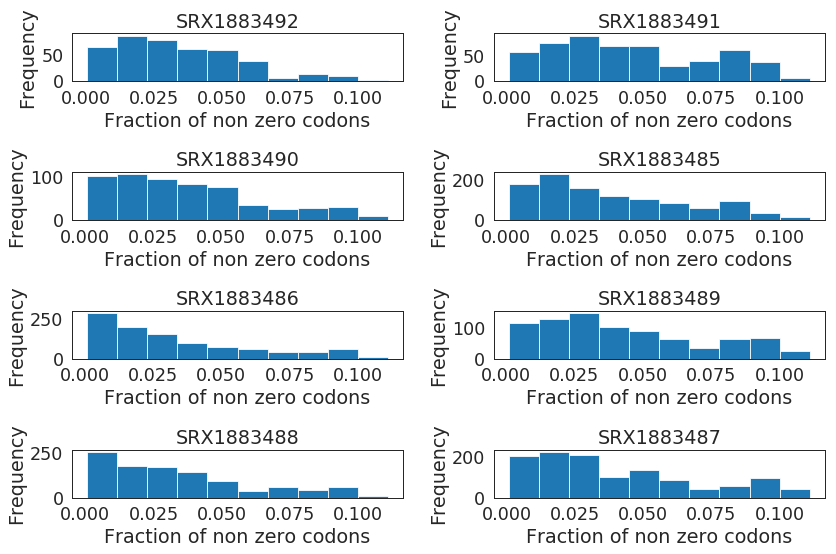

In [140]:
fig = plt.figure(figsize=(12,8))
i = 1
srp = 'SRP077522'

for key, df in ribocop_results_srpwise[srp].items():
    ax = plt.subplot(4, 2, i)
    df['valid_codons_ratio'].plot(kind='hist', ax=ax)
    i+=1
    ax.set_title(key)
    ax.set_xlabel('Fraction of non zero codons')
fig.tight_layout()

fig.savefig('nc_rna_valid_codons_ratio_dist.pdf')

# Distribution of ncRNA lengths

In [138]:
(df[df['length']<1000]['length']/3).describe()

count    1190.000000
mean       36.689076
std        40.030297
min         5.000000
25%        13.000000
50%        22.000000
75%        44.000000
max       333.000000
Name: length, dtype: float64

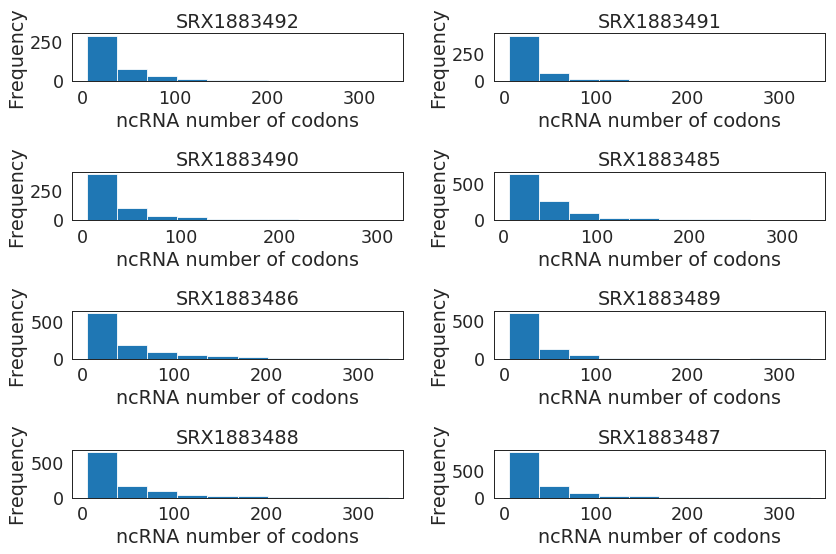

In [139]:
fig = plt.figure(figsize=(12,8))
i = 1
for key, df in ribocop_results_srpwise[srp].items():
    ax = plt.subplot(4, 2, i)
    (df[df['length']<1000]['length']/3).plot(kind='hist', ax=ax)
    i+=1
    ax.set_title(key)
    ax.set_xlabel('ncRNA number of codons')
fig.tight_layout()
fig.savefig('nc_rna_valid_codons_length_dist.pdf')

# Distribution of transcript_type 

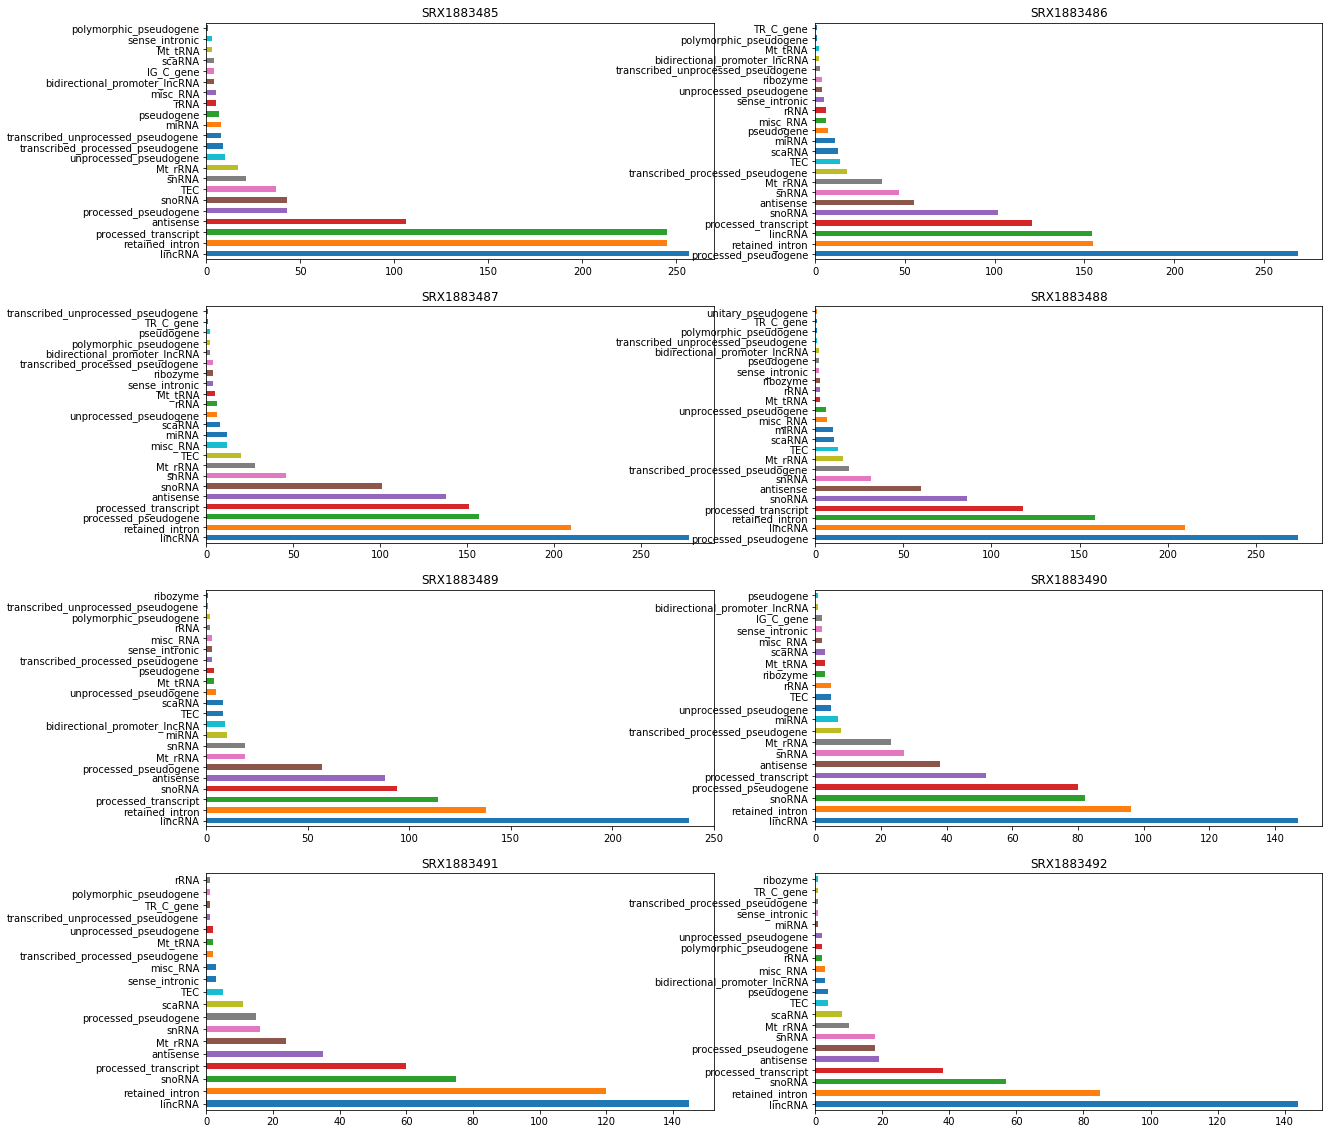

In [70]:
fig = plt.figure(figsize=(20, 20))
i = 1
metadata_df_ribo
for key in metadata_df_ribo.experiment_accession:
    df = ribocop_results_srpwise[srp][key]
    ax = plt.subplot(4, 2, i)
    df['transcript_type'].value_counts().plot(kind='barh', ax=ax)
    ax.set_title(key)
    i+=1

In [65]:
# Which RNAs are present across all samples?
index = 0
common_ncrna = pd.DataFrame()
for key, df in ribocop_results_srpwise[srp].items():
    orf_ids = set(df['ORF_ID'].tolist())
    if index == 0:
        common_ncrna = orf_ids
    else:
        common_ncrna = common_ncrna.intersection(orf_ids)
    index += 1

common_ncrna

{'ENSMUST00000082390.1_2642_2659_18'}

In [85]:
mm10_transcripts = pd.read_table('/home/cmb-panasas2/skchoudh/genomes/mm10/annotation/tx_to_gene_type_name.tsv')
mm10_transcripts = mm10_transcripts[mm10_transcripts.gene_type!='protein_coding'].sort_values(by=['gene_id', 'transcript_id'])
mm10_transcripts

,transcript_id,gene_id,transcript_type,gene_type,gene_name
13326,ENSMUST00000149974.1,ENSMUSG00000000031.15,lincRNA,lincRNA,H19
13325,ENSMUST00000152754.7,ENSMUSG00000000031.15,lincRNA,lincRNA,H19
86361,ENSMUST00000159650.7,ENSMUSG00000002791.16,processed_transcript,transcribed_unprocessed_pseudogene,Pdxk-ps
86362,ENSMUST00000160550.7,ENSMUSG00000002791.16,transcribed_unprocessed_pseudogene,transcribed_unprocessed_pseudogene,Pdxk-ps
86363,ENSMUST00000183934.1,ENSMUSG00000002791.16,processed_transcript,transcribed_unprocessed_pseudogene,Pdxk-ps
36166,ENSMUST00000006562.5,ENSMUSG00000006395.16,protein_coding,polymorphic_pseudogene,Hyi
36167,ENSMUST00000132882.1,ENSMUSG00000006395.16,retained_intron,polymorphic_pseudogene,Hyi
36165,ENSMUST00000194248.1,ENSMUSG00000006395.16,polymorphic_pseudogene,polymorphic_pseudogene,Hyi
26420,ENSMUST00000130679.1,ENSMUSG00000006462.6,lincRNA,lincRNA,A530013C23Rik
26419,ENSMUST00000141923.1,ENSMUSG00000006462.6,lincRNA,lincRNA,A530013C23Rik


In [86]:
# Which RNAs are present across all samples?
index = 0
common_ncrna = pd.DataFrame()
for key, df in ribocop_results_srpwise[srp].items():
    #orf_ids = set(list(zip(df['transcript_id'].tolist(), df['transcript_type'].tolist())))
    orf_ids = set(df['transcript_id'].tolist())
    if index == 0:
        common_ncrna = orf_ids
    else:
        common_ncrna = common_ncrna.intersection(orf_ids)
    index += 1

common_ncrna = list(common_ncrna)

In [90]:
srp = 'SRP077522'
mm10_transcripts_shortlisted = {}
mm10_transcripts_shortlisted[srp] = mm10_transcripts[mm10_transcripts.transcript_id.isin(common_ncrna)]
mm10_transcripts_shortlisted[srp]

,transcript_id,gene_id,transcript_type,gene_type,gene_name
7238,ENSMUST00000201125.3,ENSMUSG00000006638.14,processed_transcript,processed_transcript,Abhd1
54505,ENSMUST00000124106.7,ENSMUSG00000021268.17,lincRNA,lincRNA,Meg3
54504,ENSMUST00000143836.7,ENSMUSG00000021268.17,lincRNA,lincRNA,Meg3
20147,ENSMUST00000138593.8,ENSMUSG00000024845.17,processed_transcript,processed_transcript,Tmem134
68426,ENSMUST00000130912.2,ENSMUSG00000029386.15,processed_transcript,processed_transcript,Tctn2
68425,ENSMUST00000185820.6,ENSMUSG00000029386.15,processed_transcript,processed_transcript,Tctn2
62078,ENSMUST00000201414.3,ENSMUSG00000029447.11,processed_transcript,processed_transcript,Cct6a
80093,ENSMUST00000094769.10,ENSMUSG00000044730.15,processed_transcript,processed_transcript,9930104L06Rik
67168,ENSMUST00000126664.7,ENSMUSG00000046808.17,polymorphic_pseudogene,polymorphic_pseudogene,Atp10d
62632,ENSMUST00000120174.1,ENSMUSG00000047905.10,processed_pseudogene,processed_pseudogene,Gm8566


In [92]:
srp = 'SRP007567'
root_dir = '/staging/as/skchoudh/re-ribo-analysis/mm10/{}/ribocop_results'.format(srp)
sample_list = ['SRX084813', 'SRX084814', 'SRX084821', 'SRX084822', 'SRX084823', 'SRX084824', 'SRX084825']
ribocop_results_srpwise[srp] = read_all_results(root_dir, sample_list=sample_list)


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [125]:
mm10_transcripts_nc = mm10_transcripts[mm10_transcripts.gene_type!='protein_coding']
with open('mm10_nc_genes.txt', 'w') as fh:
    for gene in mm10_transcripts_nc.gene_id.unique():
        fh.write('{}\n'.format(strip_tx_version(gene)))

In [ ]:
srp = 'SRP007567'

it = iter(metadata_df_ribo.experiment_accession)
for key1 in it:
    key2 = next(key1)
    tx_id1 =  ribocop_results_srpwise[srp]['ORF_ID']

for key1, key2 in metadata_df_ribo.experiment_accession:
    print(key1, key2)

In [93]:
srp = 'SRP007567'
# Which RNAs are present across all samples?
index = 0
common_ncrna = pd.DataFrame()
for key, df in ribocop_results_srpwise[srp].items():
    #orf_ids = set(list(zip(df['transcript_id'].tolist(), df['transcript_type'].tolist())))
    orf_ids = set(df['transcript_id'].tolist())
    if index == 0:
        common_ncrna = orf_ids
    else:
        common_ncrna = common_ncrna.intersection(orf_ids)
    index += 1

common_ncrna = list(common_ncrna)

In [94]:
srp = 'SRP007567'
mm10_transcripts_shortlisted[srp] = mm10_transcripts[mm10_transcripts.transcript_id.isin(common_ncrna)]
mm10_transcripts_shortlisted[srp]

,transcript_id,gene_id,transcript_type,gene_type,gene_name
36165,ENSMUST00000194248.1,ENSMUSG00000006395.16,polymorphic_pseudogene,polymorphic_pseudogene,Hyi
7238,ENSMUST00000201125.3,ENSMUSG00000006638.14,processed_transcript,processed_transcript,Abhd1
54505,ENSMUST00000124106.7,ENSMUSG00000021268.17,lincRNA,lincRNA,Meg3
54504,ENSMUST00000143836.7,ENSMUSG00000021268.17,lincRNA,lincRNA,Meg3
20147,ENSMUST00000138593.8,ENSMUSG00000024845.17,processed_transcript,processed_transcript,Tmem134
68426,ENSMUST00000130912.2,ENSMUSG00000029386.15,processed_transcript,processed_transcript,Tctn2
68425,ENSMUST00000185820.6,ENSMUSG00000029386.15,processed_transcript,processed_transcript,Tctn2
62078,ENSMUST00000201414.3,ENSMUSG00000029447.11,processed_transcript,processed_transcript,Cct6a
13112,ENSMUST00000056948.9,ENSMUSG00000044211.9,processed_pseudogene,processed_pseudogene,Gm7887
80093,ENSMUST00000094769.10,ENSMUSG00000044730.15,processed_transcript,processed_transcript,9930104L06Rik


In [101]:
index = 0
for key, df in mm10_transcripts_shortlisted.items():
    print(key, df.shape)
    if index == 0:
        two_datasets_common = df.transcript_id.tolist()
    else:
        two_datasets_common = set(df.transcript_id.tolist()).intersection(two_datasets_common)
    index+=1

SRP077522 (123, 5)
SRP007567 (273, 5)


In [120]:
index = 0
for key, df in mm10_transcripts_shortlisted.items():
    print(key, df.shape)
    if index == 0:
        two_datasets_union = df.transcript_id.tolist()
    else:
        two_datasets_union = set(df.transcript_id.tolist()).union(two_datasets_union)
    index+=1

SRP077522 (123, 5)
SRP007567 (273, 5)


In [102]:
tx_shortlisted = mm10_transcripts_shortlisted[srp]
tx_shortlisted = tx_shortlisted[tx_shortlisted.transcript_id.isin(two_datasets_common)]
tx_shortlisted

,transcript_id,gene_id,transcript_type,gene_type,gene_name
7238,ENSMUST00000201125.3,ENSMUSG00000006638.14,processed_transcript,processed_transcript,Abhd1
54505,ENSMUST00000124106.7,ENSMUSG00000021268.17,lincRNA,lincRNA,Meg3
54504,ENSMUST00000143836.7,ENSMUSG00000021268.17,lincRNA,lincRNA,Meg3
20147,ENSMUST00000138593.8,ENSMUSG00000024845.17,processed_transcript,processed_transcript,Tmem134
68426,ENSMUST00000130912.2,ENSMUSG00000029386.15,processed_transcript,processed_transcript,Tctn2
68425,ENSMUST00000185820.6,ENSMUSG00000029386.15,processed_transcript,processed_transcript,Tctn2
62078,ENSMUST00000201414.3,ENSMUSG00000029447.11,processed_transcript,processed_transcript,Cct6a
80093,ENSMUST00000094769.10,ENSMUSG00000044730.15,processed_transcript,processed_transcript,9930104L06Rik
67168,ENSMUST00000126664.7,ENSMUSG00000046808.17,polymorphic_pseudogene,polymorphic_pseudogene,Atp10d
62632,ENSMUST00000120174.1,ENSMUSG00000047905.10,processed_pseudogene,processed_pseudogene,Gm8566


In [123]:
tx_shortlisted_union = mm10_transcripts[mm10_transcripts.transcript_id.isin(two_datasets_union)]
tx_shortlisted_union

,transcript_id,gene_id,transcript_type,gene_type,gene_name
36165,ENSMUST00000194248.1,ENSMUSG00000006395.16,polymorphic_pseudogene,polymorphic_pseudogene,Hyi
7238,ENSMUST00000201125.3,ENSMUSG00000006638.14,processed_transcript,processed_transcript,Abhd1
54505,ENSMUST00000124106.7,ENSMUSG00000021268.17,lincRNA,lincRNA,Meg3
54504,ENSMUST00000143836.7,ENSMUSG00000021268.17,lincRNA,lincRNA,Meg3
20147,ENSMUST00000138593.8,ENSMUSG00000024845.17,processed_transcript,processed_transcript,Tmem134
68426,ENSMUST00000130912.2,ENSMUSG00000029386.15,processed_transcript,processed_transcript,Tctn2
68425,ENSMUST00000185820.6,ENSMUSG00000029386.15,processed_transcript,processed_transcript,Tctn2
62078,ENSMUST00000201414.3,ENSMUSG00000029447.11,processed_transcript,processed_transcript,Cct6a
13112,ENSMUST00000056948.9,ENSMUSG00000044211.9,processed_pseudogene,processed_pseudogene,Gm7887
80093,ENSMUST00000094769.10,ENSMUSG00000044730.15,processed_transcript,processed_transcript,9930104L06Rik


In [124]:
with open('mm10_nc_genes_shortlisted_union_ESC.txt', 'w') as fh:
    for gene in tx_shortlisted_union.gene_id.unique():
        fh.write('{}\n'.format(strip_tx_version(gene)))

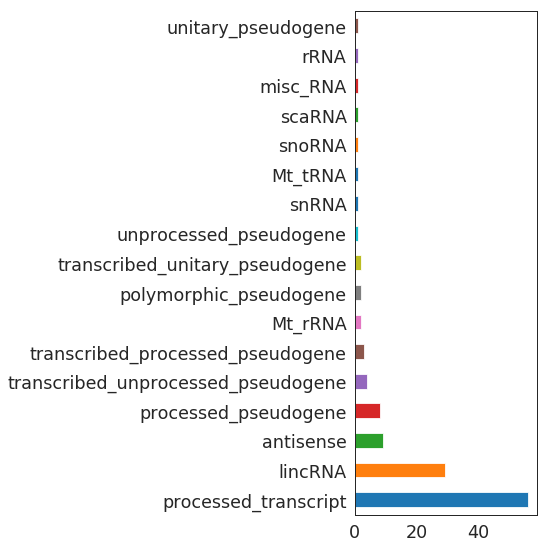

In [108]:
fig, ax = plt.subplots(figsize=(8, 8))

tx_shortlisted.gene_type.value_counts().plot(kind='barh')
fig.tight_layout()
fig.savefig('lincrna_distribution.pdf')

In [110]:
human_mouse_ortholog = pd.read_table('../../svd-project/ortholog_tsv/mmusculus_hsapiens.tsv')
human_mouse_ortholog.head()

,ensembl_gene_id,hsapiens_homolog_ensembl_gene,hsapiens_homolog_associated_gene_name,hsapiens_homolog_ensembl_peptide,hsapiens_homolog_chromosome,hsapiens_homolog_chrom_start,hsapiens_homolog_chrom_end,hsapiens_homolog_canonical_transcript_protein,hsapiens_homolog_subtype,hsapiens_homolog_orthology_type,hsapiens_homolog_perc_id,hsapiens_homolog_perc_id_r1,hsapiens_homolog_goc_score,hsapiens_homolog_wga_coverage,hsapiens_homolog_dn,hsapiens_homolog_ds,hsapiens_homolog_orthology_confidence
0,ENSMUSG00000064370,ENSG00000198727,MT-CYB,ENSP00000354554,MT,14747,15887,ENSMUSP00000081003,Eutheria,ortholog_one2one,77.9528,78.1579,50.0,100.0,0.1292,51.9926,1
1,ENSMUSG00000064368,ENSG00000198695,MT-ND6,ENSP00000354665,MT,14149,14673,ENSMUSP00000081002,Boreoeutheria,ortholog_one2one,52.9070,52.2989,75.0,100.0,0.3487,13.0048,1
2,ENSMUSG00000064367,ENSG00000198786,MT-ND5,ENSP00000354813,MT,12337,14148,ENSMUSP00000081001,Eutheria,ortholog_one2one,63.4267,63.8474,100.0,100.0,0.2602,37.6660,1
3,ENSMUSG00000064363,ENSG00000198886,MT-ND4,ENSP00000354961,MT,10760,12137,ENSMUSP00000081000,Eutheria,ortholog_one2one,66.8845,66.8845,100.0,100.0,0.2264,11.4768,1
4,ENSMUSG00000065947,ENSG00000212907,MT-ND4L,ENSP00000354728,MT,10470,10766,ENSMUSP00000081021,Eutheria,ortholog_one2one,66.3265,66.3265,100.0,100.0,0.2122,76.2474,1


# What are the characteristics of these lincRNAs/processed_transcripts?

# Are any of these lncRNAs conserved in humans?

In [112]:
tx_shortlisted['gene_id_stripped'] = [strip_tx_version(txid) for txid in  tx_shortlisted.gene_id]

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
set(tx_shortlisted['gene_id_stripped']).intersection(human_mouse_ortholog.ensembl_gene_id)

{'ENSMUSG00000044730',
 'ENSMUSG00000046808',
 'ENSMUSG00000064647',
 'ENSMUSG00000065037',
 'ENSMUSG00000088789',
 'ENSMUSG00000103081'}